# 주성분 분석(Principal Component Analysis, PCA)

####  사이킷런의  decomposition 서브패키지, PCA 클래스
####  입력 인수

- n_components : 정수
#### 메서드:
- fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
- inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀
#### 속성
- mean_ : 평균 벡터
- components_ : 주성분 벡터
- explained_variance_ratio_ : 주성분의 설명력 

### 진행 순서 
1. 데이터를 로드 및 확인 

2. 데이터 스케일링 

3. PCA함수를 활용해 PC score를 얻음

4. PC score를 이용한 SVM 분류 성능 확인

In [1]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
import scipy as sp  # Scipy Package 
from scipy import stats  # Scipy Package 

from sklearn import datasets # sklearn dataset 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [2]:
## 데이터셋 로드 
data = datasets.load_iris()

# 꽃의 특징 (input data)
t_input_data = data['data'] 

#꽃 종류를 수치로 나탄내 것 (0 ~ 2) (target data)
target_data = data['target'] 

# 꽃 종류를 이름으로 나타낸 것
flowers = data['target_names'] 

# 꽃 특징들의 명칭
feature_names = data['feature_names'] 

#sepal : 꽃받침, #petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

iris_df = pd.DataFrame(t_input_data, columns=feature_names)
iris_df['species'] = target_data

#맨 위에 있는 데이터 5개출력 
iris_df.head(5)

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
## 데이터 셋 확인 
train_input = t_input_data
train_target = target_data 

print(train_input.shape)
print(train_target.shape)
print(set(train_target))
print(flowers)

## 스케일링 & 표준화 : PCA전 표준화 필수 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
X_train_std=scaler.transform(train_input)

(150, 4)
(150,)
{0, 1, 2}
['setosa' 'versicolor' 'virginica']


In [4]:
X_train_std.shape

(150, 4)

In [5]:
## PCA 라이브러리
from sklearn.decomposition import PCA

## PC값 산출 
pca = PCA(n_components = 2) # feature 변수 개수가 2개
pca.fit(X_train_std)

# PCA eigen_vecor 수 
print(pca.n_components_)

## eigen_vector(주성분 벡터)
print('eigen_vector(주성분 벡터):\n', pca.components_)
print()
# eigen value
print('eigen value:', pca.explained_variance_) 

# X_train_std * eigen vector : 새로운 공간에서 좌표값으로 나타남
pc_score = pca.transform(X_train_std) # 변환 결과 
pc_inverse = pca.inverse_transform(pc_score) # 역변환 결과 

pca_Df = pd.DataFrame(data=pc_score, columns = ['principal component1', 'principal component2'])

2
eigen_vector(주성분 벡터):
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

eigen value: [2.93808505 0.9201649 ]


In [6]:
# 원 데이터 
iris_df[feature_names].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
# PCA 결과 
pca_Df.head(3)

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908


In [8]:
#원 변수의 분산합(스케일 전) : 3.89
print(train_input.var())

#주성분 점수의 분산 = eigen value = 3.89
pca_Df.var() 

3.896056416666667


principal component1    2.938085
principal component2    0.920165
dtype: float64

In [9]:
# 주성분 간의 상관 관계 = 0 
pca_Df.corr()

,principal component1,principal component2
principal component1,1.000000e+00,-1.521935e-16
principal component2,-1.521935e-16,1.000000e+00


### PC score 직접 계산 

In [10]:
## PC score 직접 계산 

## eigen vector
# column vector가 eigen vector가 되도록 transpose()
print("eigen vector:\n",pca.components_)
eigens_v = pca.components_.transpose()

print("eigen vector transpose:\n", eigens_v)

## centering 작업(스케일링이 되어 있어 결과값 차이 없을 것)
print("centering before:\n", X_train_std[:5])

# 2차원 행렬 변환 
m_Xtrain_std = np.matrix(X_train_std)
# centering (값 - 평균)
for i in range(X_train_std.shape[1]): # 4 
    m_Xtrain_std[:,i] = m_Xtrain_std[:,i] - np.mean(X_train_std[:,i]) 
    
print("centering after:\n", m_Xtrain_std[:5])

eigen vector:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
eigen vector transpose:
 [[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]
centering before:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
centering after:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [11]:
# PC score : 데이터 * eigen vector 
(m_Xtrain_std * eigens_v)[0:5]

matrix([[-2.26470281,  0.4800266 ],
        [-2.08096115, -0.67413356],
        [-2.36422905, -0.34190802],
        [-2.29938422, -0.59739451],
        [-2.38984217,  0.64683538]])

In [12]:
# pca 함수로 계산한 pc score 확인 
pca_Df.head()

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [13]:
# 원 데이터 
print(X_train_std[0])
print()

# pca 함수로 계산한 PC Score
print(pc_score[0])

# 계산한 PC Score
print((m_Xtrain_std * eigens_v)[0])

#  PC Score -> 원 데이터  
pca.inverse_transform(pc_score[0])

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]

[-2.26470281  0.4800266 ]
[[-2.26470281  0.4800266 ]]


array([-0.99888895,  1.05319838, -1.30270654, -1.24709825])

In [14]:
# 분산량의 설명량
print(pca.explained_variance_ratio_)

# 두 개의 주성분이 전체 분산의 약 96%를 설명
print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


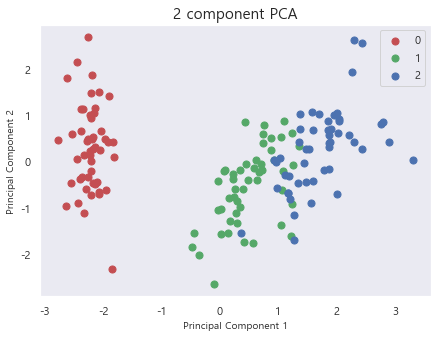

In [15]:
##  시각화 
pca_Df['target'] = train_target 

fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize=15)

targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_Df['target'] == target
    ax.scatter(pca_Df.loc[indicesToKeep, 'principal component1']
               , pca_Df.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 3개의 주성분 확인 

In [16]:
## 3개의 주성분 확인, 분산량 높은 것 확인 위함 
pca3 = PCA(n_components=3)

pc3_score = pca3.fit_transform(X_train_std)

pc3_DF = pd.DataFrame(data=pc3_score, columns = ['PC1', 'PC2', 'PC3'])
print(pca3.explained_variance_ratio_) # 3번째 주성분은 설명량 0.03(낮음) 
print(sum(pca3.explained_variance_ratio_))

[0.72962445 0.22850762 0.03668922]
0.9948212908928451


### PC score를 이용한 SVM 분류 성능 확인

In [17]:
## SVM 패키지 임포트 
from sklearn.svm import SVC 

# 선형 SVM, C = 1
model_svm = SVC(kernel='linear', C = 1.5, random_state = 20)

In [18]:
## 오리지널 데이터 모델링
model_svm.fit(X_train_std,train_target) 

# 모델 성능 확인 
print(model_svm.score(X_train_std,train_target))

# 오류 데이터 확인 
model_svm_pred = model_svm.predict(X_train_std)
print(np.where(train_target!=model_svm_pred))

0.9666666666666667
(array([68, 70, 72, 77, 83], dtype=int64),)


In [19]:
## PCA2 데이터 모델링 

X_train_PCA = pca_Df[["principal component1","principal component2"]]

model_svm.fit(X_train_PCA,train_target) 

# 모델 성능 확인 
print(model_svm.score(X_train_PCA,train_target))

# 오류 데이터 확인 
model_svm_pca_pred = model_svm.predict(X_train_PCA)
print(np.where(train_target!=model_svm_pca_pred))

0.9133333333333333
(array([ 52,  54,  68,  72,  76,  77,  83,  87, 106, 121, 127, 138, 149],
      dtype=int64),)


In [20]:
## PCA3 데이터 모델링 
X_train_PCA3 = pc3_DF[["PC1","PC2","PC3"]]

model_svm.fit(X_train_PCA3,train_target) 

# 모델 성능 확인 
print(model_svm.score(X_train_PCA3,train_target))

# 오류 데이터 확인 
model_svm_pca3_pred = model_svm.predict(X_train_PCA3)
print(np.where(train_target!=model_svm_pca3_pred))

0.96
(array([ 68,  70,  72,  77,  83, 133], dtype=int64),)
